In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
import csv

data_info_all = {}
data_classes = {}
# get data info from eeg_grades.csv
info_filepath = "..\data\eeg_grades.csv"
with open(info_filepath, 'r') as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip header line
    for row in reader:
        data_info_all[row[0]] = (row[1], row[2], row[3])
        data_classes[row[0]] = row[3]
print(data_classes)

{'ID01_epoch1': '', 'ID01_epoch2': '', 'ID02_epoch1': '1', 'ID02_epoch2': '2', 'ID02_epoch3': '1', 'ID02_epoch4': '1', 'ID03_epoch1': '', 'ID03_epoch2': '', 'ID03_epoch3': '', 'ID04_epoch1': '3', 'ID04_epoch2': '4', 'ID04_epoch3': '4', 'ID04_epoch4': '4', 'ID05_epoch1': '', 'ID06_epoch1': '4', 'ID06_epoch2': '3', 'ID06_epoch3': '4', 'ID06_epoch4': '4', 'ID07_epoch1': '1', 'ID07_epoch2': '1', 'ID07_epoch3': '1', 'ID07_epoch4': '1', 'ID08_epoch1': '', 'ID08_epoch2': '', 'ID09_epoch1': '', 'ID09_epoch2': '', 'ID09_epoch3': '', 'ID09_epoch4': '', 'ID09_epoch5': '', 'ID10_epoch1': '1', 'ID10_epoch2': '1', 'ID10_epoch3': '2', 'ID10_epoch4': '1', 'ID11_epoch1': '', 'ID11_epoch2': '', 'ID12_epoch1': '', 'ID13_epoch1': '1', 'ID13_epoch2': '1', 'ID14_epoch1': '1', 'ID14_epoch2': '1', 'ID15_epoch1': '1', 'ID15_epoch2': '1', 'ID16_epoch1': '1', 'ID16_epoch2': '1', 'ID16_epoch3': '2', 'ID17_epoch1': '1', 'ID17_epoch2': '1', 'ID17_epoch3': '1', 'ID18_epoch1': '', 'ID18_epoch2': '', 'ID18_epoch3': ''

In [3]:
# setting up data files

files_basepath = "../data/EDF_format/"
files_names = data_classes.keys()
files_data = []
for filename in files_names:
    file = mne.io.read_raw_edf(files_basepath+filename+".edf")
    files_data.append(file)

Extracting EDF parameters from h:\PhD\7 OtherActivities\72 Infant ML Competition\data\EDF_format\ID01_epoch1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from h:\PhD\7 OtherActivities\72 Infant ML Competition\data\EDF_format\ID01_epoch2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from h:\PhD\7 OtherActivities\72 Infant ML Competition\data\EDF_format\ID02_epoch1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from h:\PhD\7 OtherActivities\72 Infant ML Competition\data\EDF_format\ID02_epoch2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from h:\PhD\7 OtherActivities\72 Infant ML Competition\data\EDF_format\ID02_epoch3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extra

In [4]:
# importing the data
# to load data into memory we need to:
raw = files_data[10].load_data()

Reading 0 ... 719999  =      0.000 ...  3599.995 secs...


In [5]:
print("EDF information")
print(raw.info)
print("Channels")
print(raw.ch_names)
print("Duration (s):")
print(float(raw.n_times)/raw.info['sfreq'])
print("Units:")
print(raw._orig_units)

EDF information
<Info | 7 non-empty values
 bads: []
 ch_names: F3, F4, C3, C4, O1, O2, T3, T4, Cz
 chs: 9 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2021-01-01 00:00:00 UTC
 nchan: 9
 projs: []
 sfreq: 200.0 Hz
>
Channels
['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'T3', 'T4', 'Cz']
Duration (s):
3600.0
Units:
{'F3': 'µV', 'F4': 'µV', 'C3': 'µV', 'C4': 'µV', 'O1': 'µV', 'O2': 'µV', 'T3': 'µV', 'T4': 'µV', 'Cz': 'µV'}


Using matplotlib as 2D backend.
Opening raw-browser...


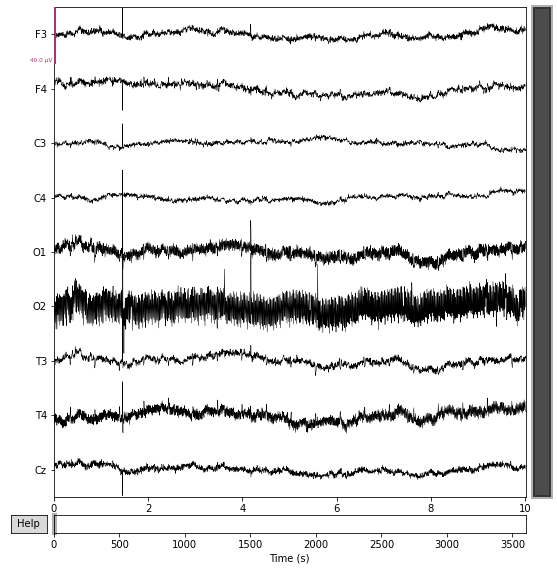

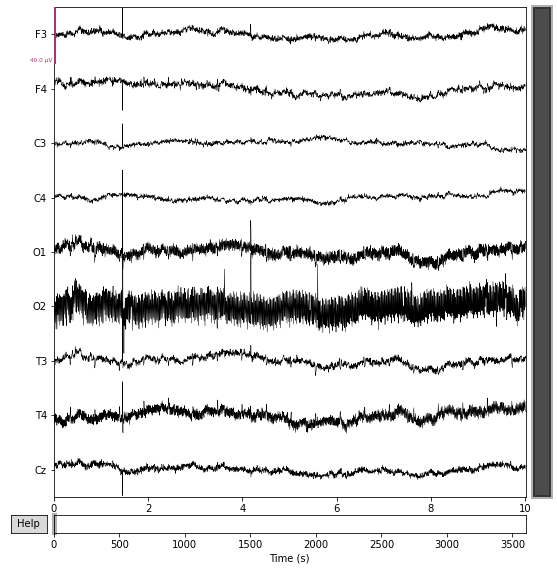

In [6]:
raw.plot()

In [7]:
# 